# Unsupervised Learning Project

This is the final project for the **Data Science in Python: Unsupervised Learning**. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

In [5]:
# read in the employee data
import pandas as pd
df = pd.read_csv('../Data/employee_data.csv')
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [6]:
# note the number of rows and columns
df.shape

(1470, 10)

In [7]:
# view the data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [8]:
# look at the numeric columns
df.dtypes[df.dtypes=='int64']

EmployeeID           int64
Age                  int64
DistanceFromHome     int64
JobLevel             int64
MonthlyIncome        int64
PerformanceRating    int64
JobSatisfaction      int64
dtype: object

In [9]:
# look at the non-numeric columns
df.dtypes[df.dtypes!='int64']

Gender        object
Department    object
Attrition     object
dtype: object

### b. Data Prep: Convert the data types

In [11]:
# create a copy of the dataframe
df2 = df.copy()
df2.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [12]:
# look at the gender values
df2['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [13]:
# change gender into a numeric field using np.where
import numpy as np
df2['Gender'] = np.where(df2.Gender =='Female',1,0)
df2['Gender'].dtype

dtype('int32')

In [14]:
df2['Gender'].value_counts()

Gender
0    882
1    588
Name: count, dtype: int64

In [15]:
# look at the attrition values
df2['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [16]:
# change attrition to a numeric field using np.where
df2['Attrition'] = np.where(df2.Attrition == 'Yes',1,0)

In [17]:
df2['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [18]:
# look at the department values
df2['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [19]:
# change department to a numeric field via dummy variables
pd.get_dummies(df2.Department).astype('int64').head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [20]:
# attach the columns back on to the dataframe
data = pd.concat([df2,pd.get_dummies(df2.Department).astype('int64')],axis=1)
data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,Sales,5993,3,4,1,0,0,1
1,1002,49,0,8,2,Research & Development,5130,4,2,0,0,1,0
2,1004,37,0,2,1,Research & Development,2090,3,3,1,0,1,0
3,1005,33,1,3,1,Research & Development,2909,3,3,0,0,1,0
4,1007,27,0,2,1,Research & Development,3468,3,2,0,0,1,0


In [21]:
# view the cleaned dataframe
data['Human Resources'].value_counts()

Human Resources
0    1407
1      63
Name: count, dtype: int64

In [22]:
data.dtypes

EmployeeID                 int64
Age                        int64
Gender                     int32
DistanceFromHome           int64
JobLevel                   int64
Department                object
MonthlyIncome              int64
PerformanceRating          int64
JobSatisfaction            int64
Attrition                  int32
Human Resources            int64
Research & Development     int64
Sales                      int64
dtype: object

In [23]:
# note the number of rows and columns
data.shape

(1470, 13)

### c. EDA

In [25]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?
data.Attrition.mean() # 16% employee leave the company

0.16122448979591836

In [26]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
data.groupby('Attrition').mean(numeric_only=True)

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


**TAKEAWAYS**: People who stay tend to be older, female, live close by, more senior, are happy with their jobs and work in research & development

### d. Data Prep: Remove the Attrition and ID Columns

In [29]:
# create a new dataframe without the attrition column for us to model on
data_prep = data.drop(columns='Attrition')
data_prep.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,Sales,5993,3,4,0,0,1
1,1002,49,0,8,2,Research & Development,5130,4,2,0,1,0
2,1004,37,0,2,1,Research & Development,2090,3,3,0,1,0
3,1005,33,1,3,1,Research & Development,2909,3,3,0,1,0
4,1007,27,0,2,1,Research & Development,3468,3,2,0,1,0


In [30]:
# drop the employee column as well before modeling
data_prep.drop(columns='EmployeeID',inplace=True)

In [31]:
data_prep.drop(columns='Department',inplace=True)

In [32]:
data_prep.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [33]:
# note the number of rows and columns in the dataframe
data_prep.shape

(1470, 10)

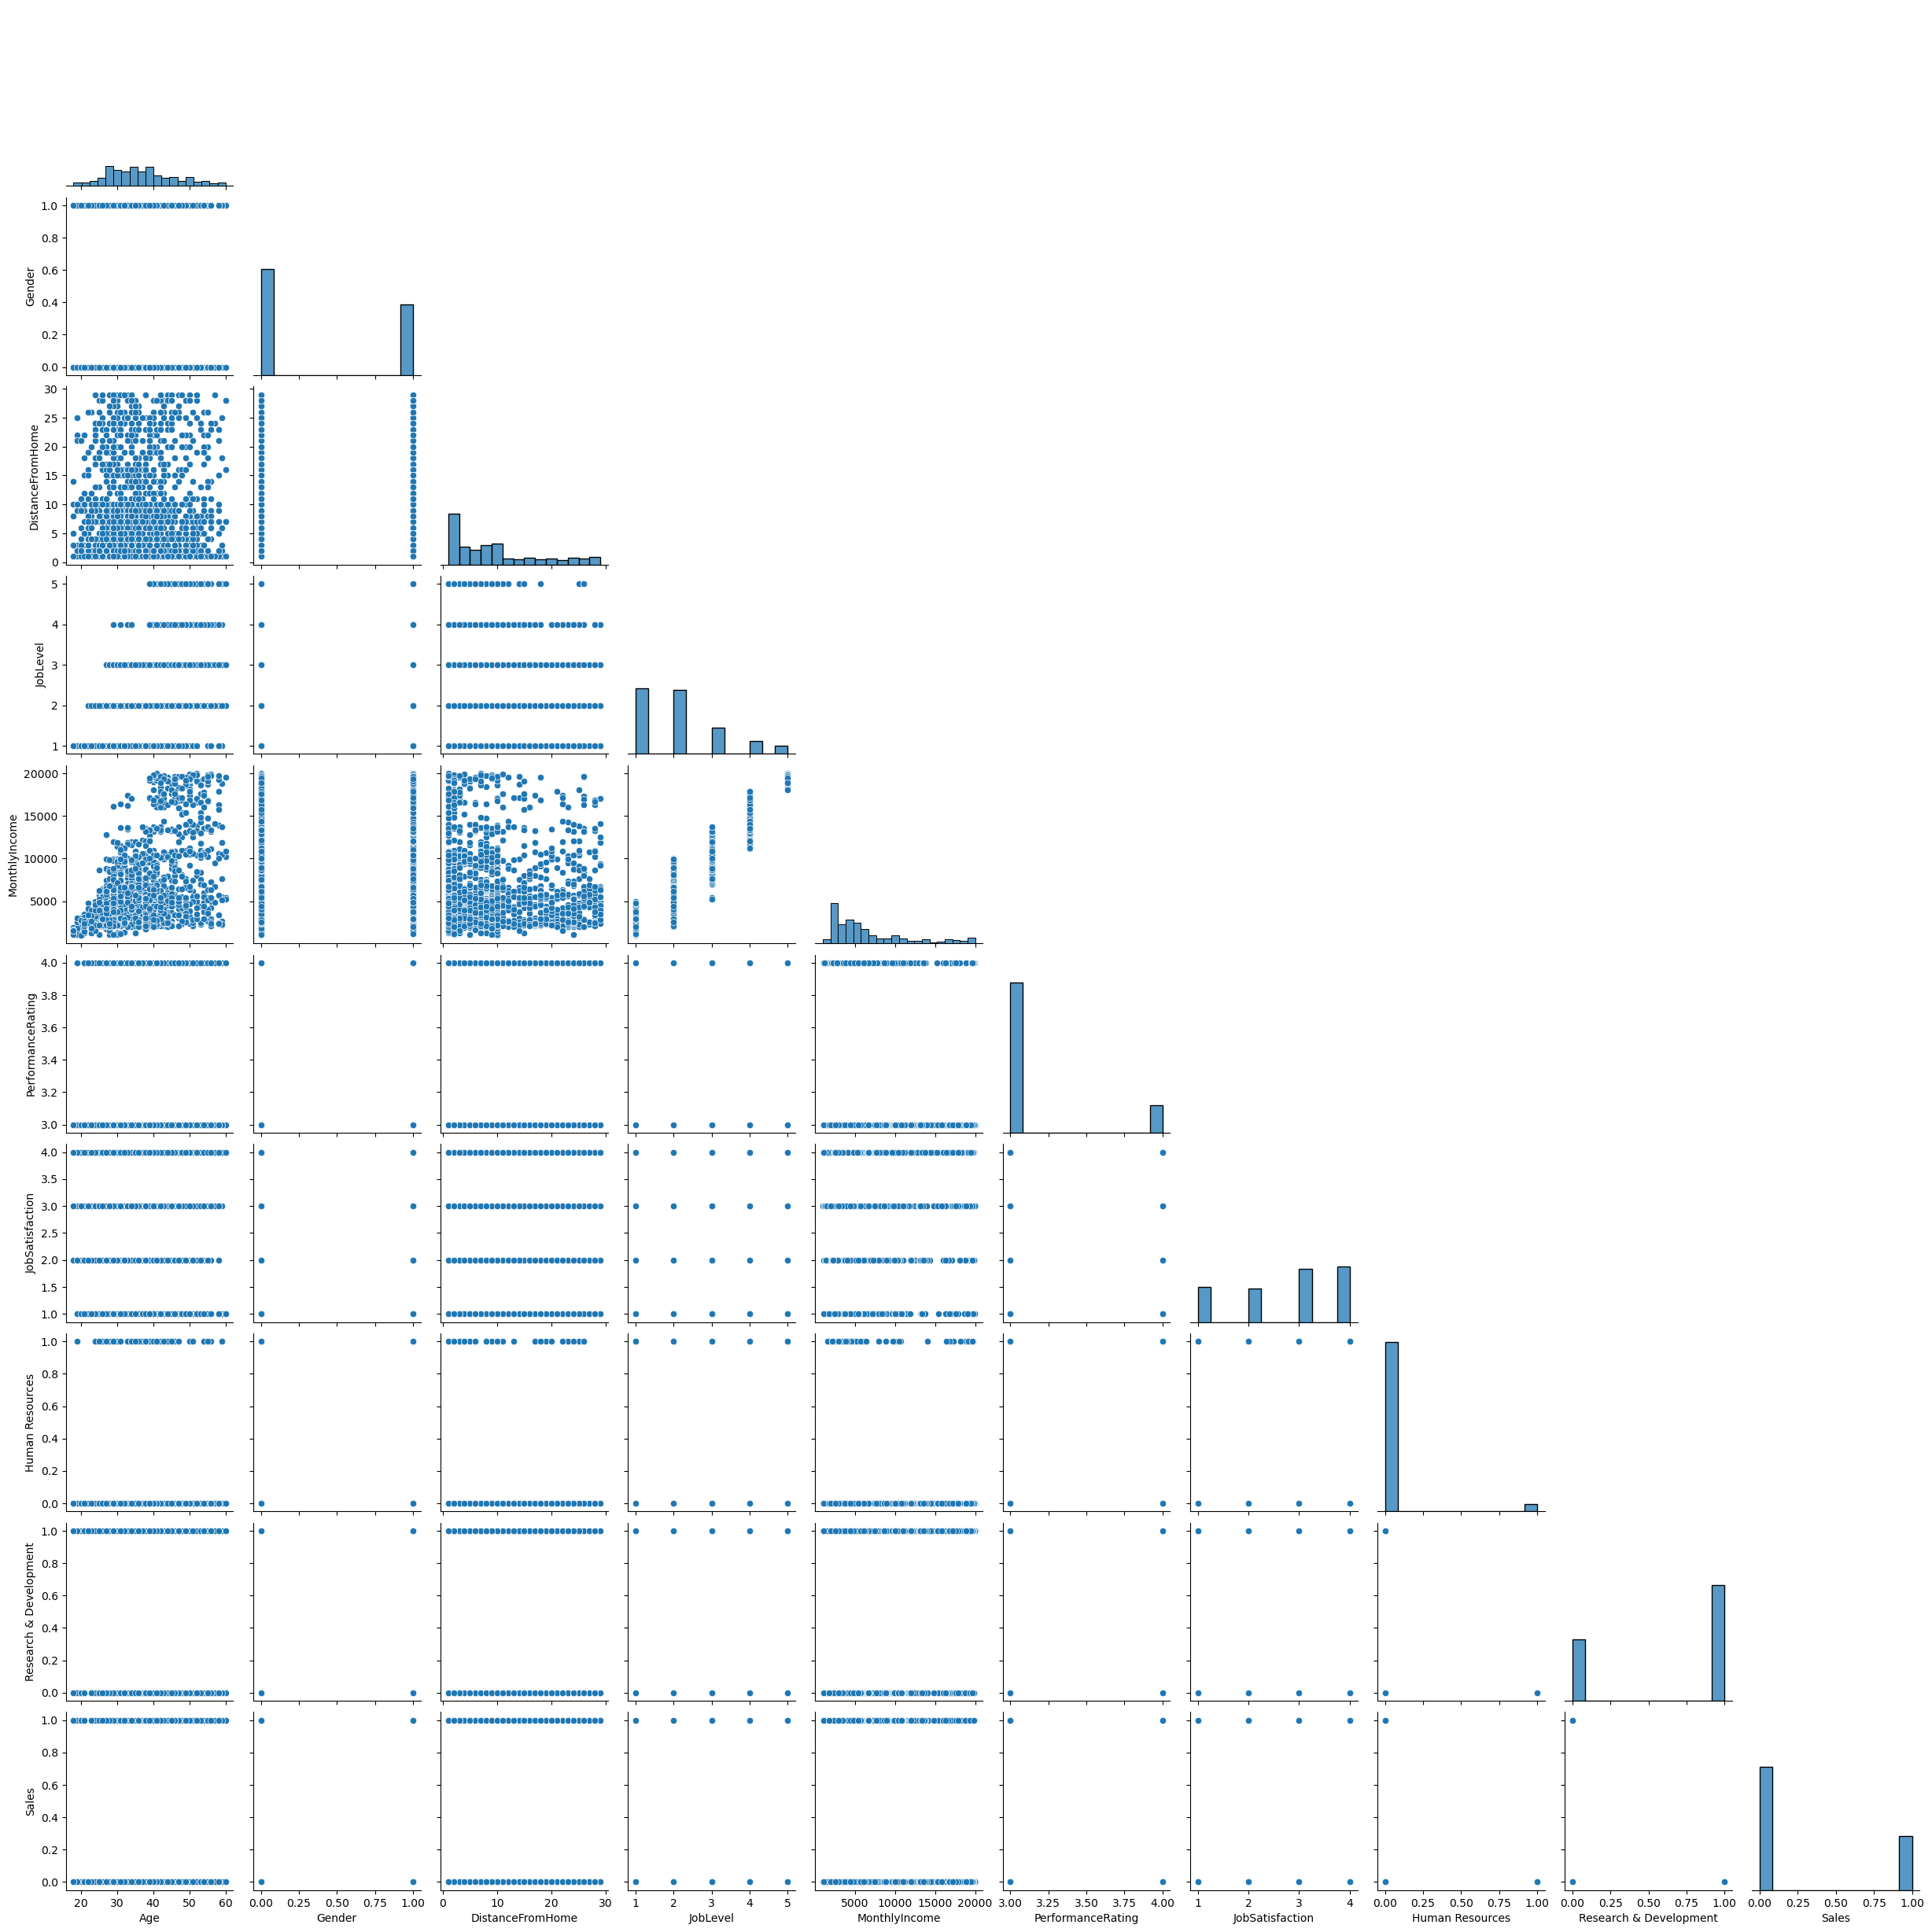

In [59]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
import seaborn as sns

sns.pairplot(data_prep,corner=True);

**OBSERVATIONS**:
* Age and gender seem to be pretty evenly distributed
* More people live closer to the office
* Job level and income are correlated
* There are fewer high performers
* Most people are happy with the jobs
* There are few people in HR compared to the other departments

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [275]:
data_prep.isna().sum()

Age                       0
Gender                    0
DistanceFromHome          0
JobLevel                  0
MonthlyIncome             0
PerformanceRating         0
JobSatisfaction           0
Human Resources           0
Research & Development    0
Sales                     0
dtype: int64

In [288]:
data_prep.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [292]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_prep), columns=data_prep.columns)
df_scaled.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [294]:
# double check that all the column means are 0 and standard deviations are 1
df_scaled.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [296]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# create 2 - 15 clusters, and add the intertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

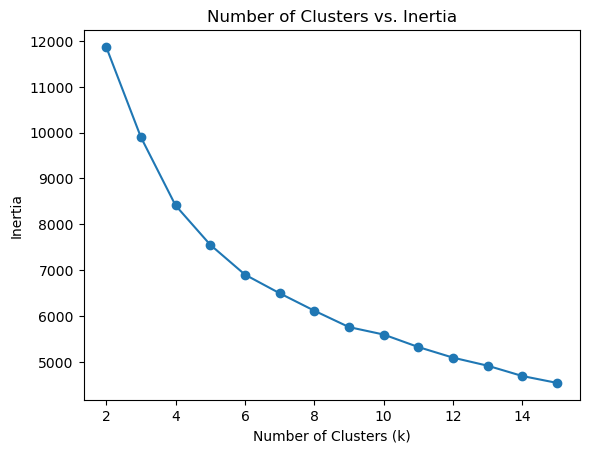

In [297]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

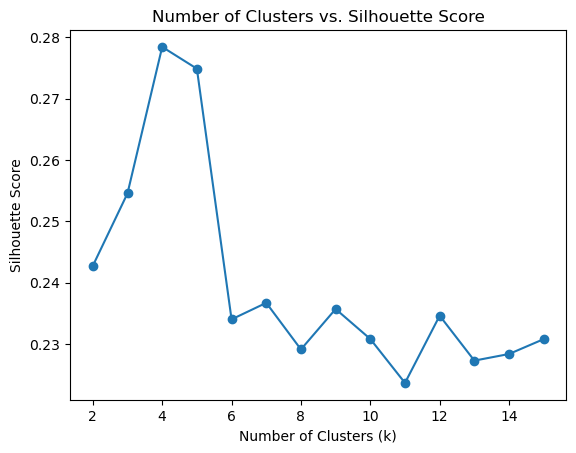

In [298]:
# plot the silhouette scores
# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [302]:
# fit a kmeans model for the k value that you identified
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [304]:
# find the number of employees in each cluster
from collections import Counter

Counter(kmeans4.labels_)

Counter({0: 747, 1: 407, 2: 253, 3: 63})

In [306]:
kmeans4.cluster_centers_

array([[-2.47161322e-01, -3.22445102e-02,  5.64768889e-03,
        -5.44115439e-01, -5.34532480e-01,  2.65551131e-02,
        -1.50915365e-03, -2.11603685e-01,  7.27775108e-01,
        -6.59959753e-01],
       [-1.70572803e-01,  3.10950786e-02,  4.11250170e-02,
        -6.71856870e-03, -1.02924260e-01, -5.15839243e-02,
         3.44801269e-02, -2.11603685e-01, -1.37405084e+00,
         1.51524392e+00],
       [ 9.80009624e-01,  8.71359988e-02, -6.76506695e-02,
         1.62459252e+00,  1.73579806e+00,  1.20911029e-02,
        -2.26891389e-02, -2.11603685e-01,  4.03778222e-01,
        -3.24651677e-01],
       [ 9.69873540e-02, -1.68483421e-01, -6.09696216e-02,
        -2.90986930e-02,  3.22068009e-02, -3.01755763e-02,
        -1.13741615e-01,  4.72581563e+00, -1.37405084e+00,
        -6.59959753e-01]])

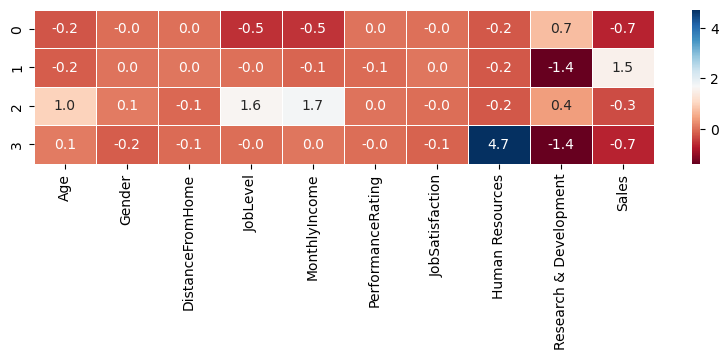

In [308]:
# create a heat map of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_scaled.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

# interpret the clusters

* Cluster 0: junior, research & dev employees
* Cluster 1: sales employees
* Cluster 2: senior employees
* Cluster 3: HR employees

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [314]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [316]:
# view the explained variance ratio
pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [318]:
# view the components
pca.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [-0.21384802,  0.00840873,  0.01653328, -0.14533326, -0.17730123,
        -0.04153184,  0.01140416,  0.11374447, -0.67887246,  0.65246219]])

In [320]:
# view the columns
df_scaled.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')


Interpret the components:
* Component 1: higher age, job level, monthly income = more senior
* Component 2: lower = research, higher = sales

### b. Overlay the K-Means cluster colors

In [323]:
# transform the data
df_scaled_transformed = pd.DataFrame(pca.transform(df_scaled), columns=['PC1', 'PC2'])
df_scaled_transformed.head()

,PC1,PC2
0,0.765263,1.853973
1,-0.031684,-1.285674
2,-1.462588,-0.645564
3,-1.449531,-0.563547
4,-1.758252,-0.473654


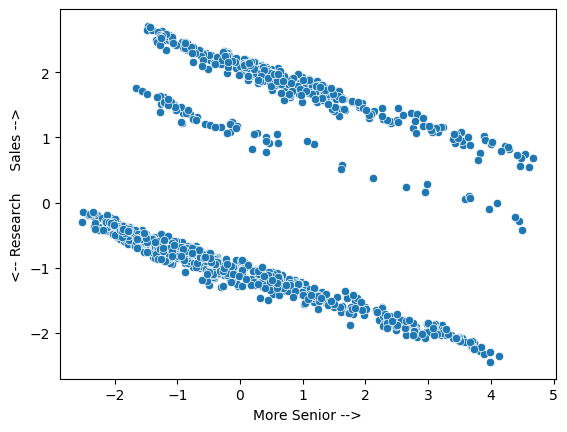

In [339]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)
plt.xlabel('More Senior -->')
plt.ylabel('<-- Research     Sales -->');

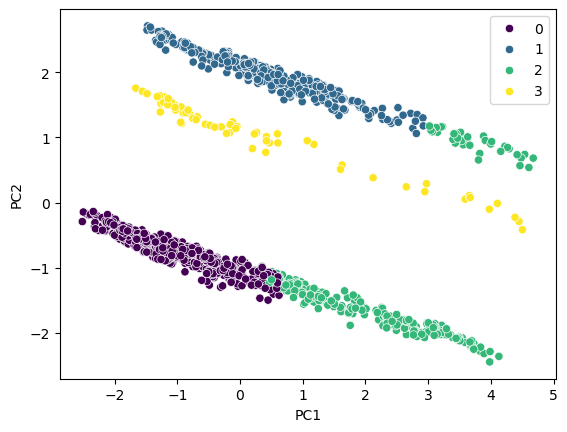

In [341]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=kmeans4.labels_, palette='viridis');

### c. Overlay the Department colors instead

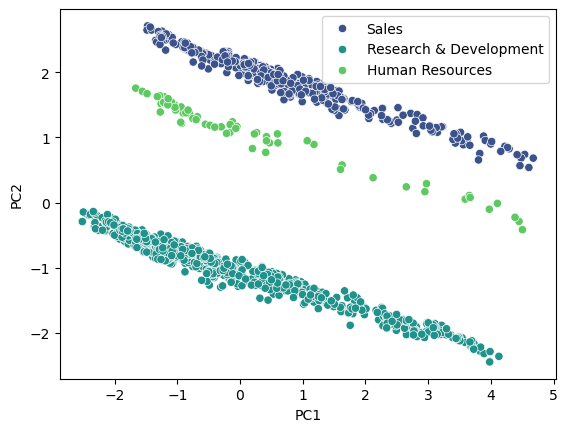

In [345]:
# overlay the department colors (hint: set the hue to be the department column)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=df2.Department, palette='viridis')

plt.legend(loc='upper right');

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [347]:
# create a new dataframe that excludes the three department columns from the scaled dataframe
df_scaled_v2 = df_scaled.iloc[:, :7]
df_scaled_v2.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [349]:
# write a loop to fit models with 2 to 15 clusters

# create an empty list to hold many inertia and silhouette values
inertia_values_v2 = []
silhouette_scores_v2 = []

# create 2 - 15 clusters, and add the intertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled_v2)
    inertia_values_v2.append(kmeans.inertia_)
    silhouette_scores_v2.append(silhouette_score(df_scaled_v2, kmeans.labels_, metric='euclidean', sample_size=None))

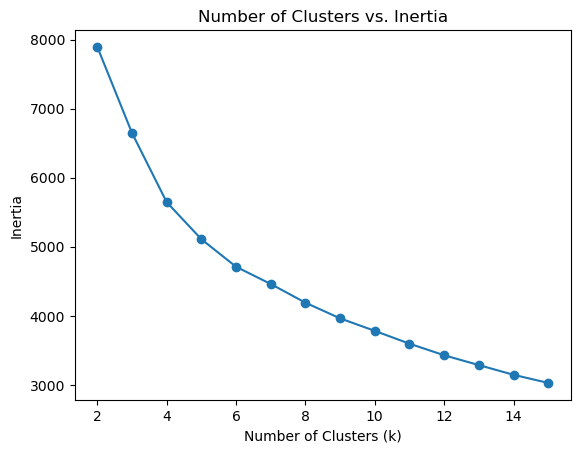

In [351]:
# plot the inertia values

# turn the list into a series for plotting
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# plot the data
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

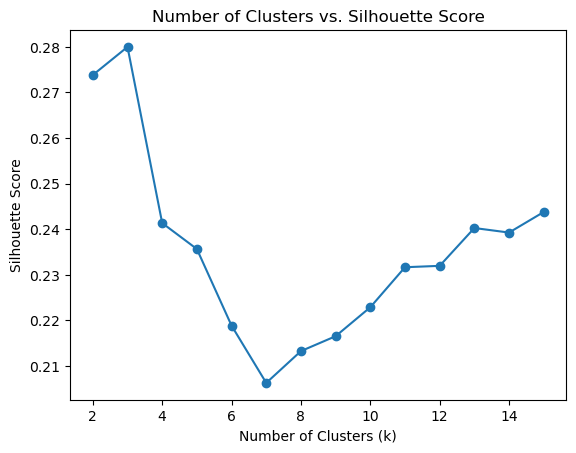

In [353]:
# plot the silhouette scores
# turn the list into a series for plotting
silhouette_series_v2 = pd.Series(silhouette_scores_v2, index=range(2, 16))

# plot the data
silhouette_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = 3

In [356]:
# fit a kmeans model for the k value that you identified
kmeans3_v2 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3_v2.fit(df_scaled_v2)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [364]:
# find the number of employees in each cluster
Counter(kmeans3_v2.labels_)

Counter({1: 988, 2: 282, 0: 200})

In [368]:
cluster_centers3_v2 = pd.DataFrame(kmeans3_v2.cluster_centers_, columns=df_scaled_v2.columns)
cluster_centers3_v2

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,-0.166860,0.010206,0.064471,-0.310823,-0.328330,2.346151,-0.016845
1,-0.270732,-0.023140,-0.010517,-0.401705,-0.422780,-0.426230,0.003830
2,1.066861,0.073832,-0.008878,1.627835,1.714087,-0.170620,-0.001470


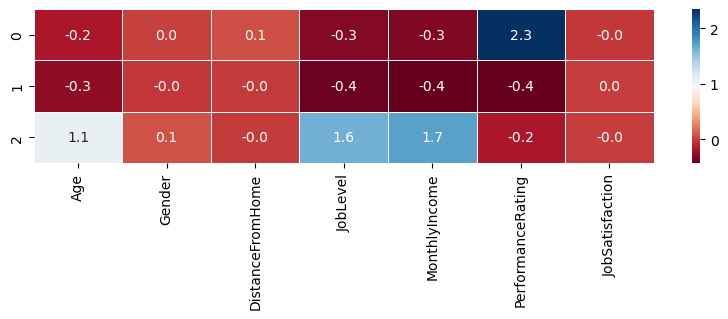

In [370]:
# create a heat map of the cluster centers
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers3_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: high performing employees
* Cluster 1: junior, low performing employees
* Cluster 2: senior employees

#### ii. k = 4

In [373]:
# fit a kmeans model for the k value that you identified
kmeans4_v2 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4_v2.fit(df_scaled_v2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [375]:
# find the number of employees in each cluster
Counter(kmeans4_v2.labels_)

Counter({2: 616, 0: 405, 1: 249, 3: 200})

In [381]:
cluster_centers4_v2 = pd.DataFrame(kmeans4_v2.cluster_centers_,columns=df_scaled_v2.columns)

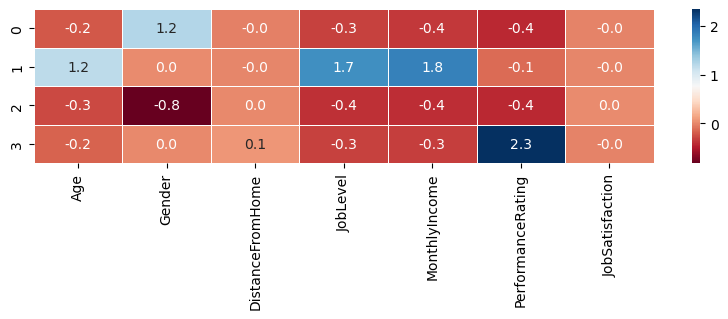

In [383]:
# create a heat map of the cluster centers
plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers4_v2,annot=True,cmap='RdBu',fmt=".1f", linewidths=.5);


Interpret the clusters:
* Cluster 0: female employees
* Cluster 1: senior employees
* Cluster 2: male employees
* Cluster 3: high performing employees

#### iii. k = 6

In [387]:
# fit a kmeans model for the k value that you identified
kmeans6_v2 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6_v2.fit(df_scaled_v2)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [389]:
# find the number of employees in each cluster
Counter(kmeans6_v2.labels_)

Counter({3: 349, 0: 304, 4: 219, 5: 201, 1: 200, 2: 197})

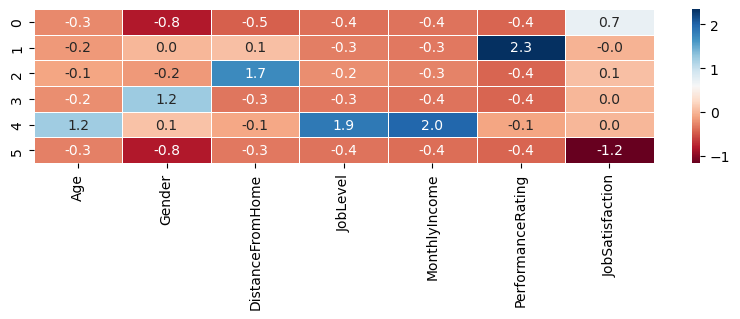

In [393]:
# create a heat map of the cluster centers
cluster_centers6_v2 = pd.DataFrame(kmeans6_v2.cluster_centers_,columns=df_scaled_v2.columns)

plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers6_v2,annot=True,cmap='RdBu',fmt=".1f", linewidths=.5);

Interpret the clusters:
* Cluster 0: men who like their jobs
* Cluster 1: high performers
* Cluster 2: long commuters
* Cluster 3: women
* Cluster 4: senior employee
* Cluster 5: men who dislike their jobs

## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [396]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca_v2 = PCA(n_components=2)
pca_v2.fit(df_scaled_v2)

PCA(n_components=2)

In [398]:
# view the explained variance ratio
pca_v2.explained_variance_ratio_

array([0.33354222, 0.14850324])

In [400]:
# view the components
pca_v2.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119]])

In [402]:
# view the columns
df_scaled_v2.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

Interpret the components:
* Component 1: higher age, job level, monthly income = more senior
* Component 2: <-- happy in job | women, longer commute, higher perfomring -->

### b. Overlay the K-Means cluster colors

In [405]:
# transform the data
df_scaled_transformed_v2 = pd.DataFrame(pca_v2.transform(df_scaled_v2), columns=['PC1', 'PC2'])
df_scaled_transformed_v2.head()

,PC1,PC2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


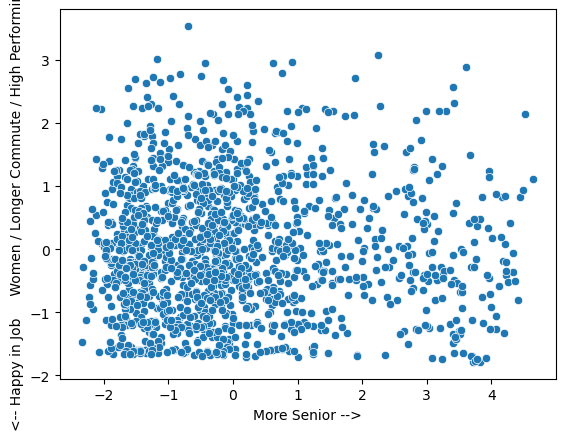

In [407]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed_v2)
plt.xlabel('More Senior -->')
plt.ylabel('<-- Happy in Job     Women / Longer Commute / High Performing -->');

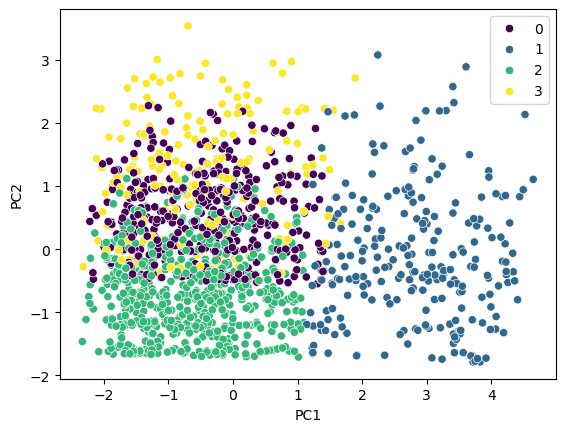

In [415]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed_v2, hue=kmeans4_v2.labels_, palette='viridis');

## 6. EDA on Clusters

Let's decide to go with the 4 clusters without department data.

### a. Confirm the 4 clusters

In [417]:
# fit a kmeans model with 6 clusters
kmeans4_v2

KMeans(n_clusters=4, n_init=10, random_state=42)

In [419]:
# view the cluster labels
kmeans4_v2.labels_

array([0, 3, 2, ..., 3, 2, 2])

### b. Create a dataframe with the cluster labels and names

In [462]:
Counter(kmeans4_v2.labels_)

Counter({2: 616, 0: 405, 1: 249, 3: 200})

In [478]:
# create a dataframe with two columns - one of the label and another of the cluster name
cluster = pd.DataFrame(kmeans4_v2.labels_,columns=['cluster'])
cluster.head()

,cluster
0,0
1,3
2,2
3,0
4,2


* Cluster 0: female employees
* Cluster 1: senior employees
* Cluster 2: male employees
* Cluster 3: high performing employees

In [480]:
# create a mapping for the cluster names
mapping={0:'female employees',1:'senior employees',2:'male employees',3:'high performing employees'}
# combine the labels and names into a single dataframe
cluster['cluster_name'] = cluster['cluster'].map(mapping)
cluster.head()

,cluster,cluster_name
0,0,female employees
1,3,high performing employees
2,2,male employees
3,0,female employees
4,2,male employees


### c. View the attrition rates for each cluster

In [482]:
# combine the clusters and attrition data
cluster = pd.concat([clusters,data.Attrition],axis=1)
cluster.head()

,cluster,cluster_name,Attrition,Attrition,Attrition,Attrition
0,0,female employees,1,1,1,1
1,3,high performing employees,0,0,0,0
2,2,male employees,1,1,1,1
3,0,female employees,0,0,0,0
4,2,male employees,0,0,0,0


In [484]:
cluster.head()

,cluster,cluster_name,Attrition,Attrition,Attrition,Attrition
0,0,female employees,1,1,1,1
1,3,high performing employees,0,0,0,0
2,2,male employees,1,1,1,1
3,0,female employees,0,0,0,0
4,2,male employees,0,0,0,0


In [486]:
# what is the attrition rate for each cluster?
cluster.groupby('cluster_name')['Attrition'].mean()

,Attrition,Attrition,Attrition,Attrition
cluster_name,,,,
female employees,0.160494,0.160494,0.160494,0.160494
high performing employees,0.185000,0.185000,0.185000,0.185000
male employees,0.183442,0.183442,0.183442,0.183442
senior employees,0.088353,0.088353,0.088353,0.088353


In [460]:
clusters[clusters['cluster_name']=='male employees']

,cluster,cluster_name,Attrition


In [ ]:
# interpret the findings
* Senior employees are most likely to stay
* Male have more possibility to leave than Female

In [490]:
# find the number of employees in each cluster
cluster['cluster'].value_counts()

cluster
2    616
0    405
1    249
3    200
Name: count, dtype: int64

### d. View the department breakdown for each cluster

In [518]:
# combine the clusters and department data
clusters = pd.concat([cluster, data.Department], axis=1)
clusters.drop(columns='Attrition',inplace=True)

In [522]:
clusters = pd.concat([clusters,data.Attrition],axis=1)

In [524]:
clusters.head()

,cluster,cluster_name,Department,Attrition
0,0,female employees,Sales,1
1,3,high performing employees,Research & Development,0
2,2,male employees,Research & Development,1
3,0,female employees,Research & Development,0
4,2,male employees,Research & Development,0


In [526]:
# what is the attrition rate for each cluster + department combination?
clusters.groupby(['cluster_name', 'Department']).mean()

cluster  Attrition
cluster_name              Department                                
female employees          Human Resources             0.0   0.428571
                          Research & Development      0.0   0.115385
                          Sales                       0.0   0.221374
high performing employees Human Resources             3.0   0.142857
                          Research & Development      3.0   0.188406
                          Sales                       3.0   0.181818
male employees            Human Resources             2.0   0.137931
                          Research & Development      2.0   0.170051
                          Sales                       2.0   0.217617
senior employees          Human Resources             1.0   0.076923
                          Research & Development      1.0   0.059172
                          Sales                       1.0   0.164179

In [528]:
# sort the values
clusters.groupby(['cluster_name', 'Department']).mean().sort_values('Attrition', ascending=False)

cluster  Attrition
cluster_name              Department                                
female employees          Human Resources             0.0   0.428571
                          Sales                       0.0   0.221374
male employees            Sales                       2.0   0.217617
high performing employees Research & Development      3.0   0.188406
                          Sales                       3.0   0.181818
male employees            Research & Development      2.0   0.170051
senior employees          Sales                       1.0   0.164179
high performing employees Human Resources             3.0   0.142857
male employees            Human Resources             2.0   0.137931
female employees          Research & Development      0.0   0.115385
senior employees          Human Resources             1.0   0.076923
                          Research & Development      1.0   0.059172